In [6]:
import numpy as np
import skvideo.io
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
#!pip install scikit-video #uncomment to install library

     |████████████████████████████████| 2.3MB 8.3MB/s 


In [2]:
from google.colab import drive
from google.colab import files
import io
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [59]:
def DFT(N):
  i, j = np.meshgrid(np.arange(N), np.arange(N))
  omega = np.exp(-2*np.pi*1J/N)
  W = np.power(omega, i*j)/np.sqrt(N)
  return W 

def hamming(n, N):
  out = np.zeros(N)
  out[0:int(np.max(n))+1] = 0.54+0.46*np.cos(2*np.pi*n/np.max(n))
  return out

Согласно статье, если мы возьмем видео, построим $y(t) = [\log{\frac{\bar{P_R^2}\bar{P_G^1}}{\bar{P_G^2}\bar{P_R^1}}}, \dots, \log{\frac{\bar{P_R^z}\bar{P_G^{z-1}}}{\bar{P_G^z}\bar{P_R^{z-1}}}}]$, где $z$ число кадров, взятых через интервалы времени $T_s = \frac{1}{fps}$, то преобразование Фурье от $y(t)$ должно иметь в своем спектре выраженный пик, примерно от 0,6 Гц до 3 Гц, что соответсвует частоте сердцебиения человека. Проверим это. Все видео здесь и далее записаны с fps = 30, как и в статье.

Первое видео при естествнном освещении в ful HD. Первый cell вычисление  $y(t)$ и пример фотографии с выделением лица в качестве ROI. Следующая за ней - просмотр спектра. Лицо воодушевленное.

(607, 1920, 1080, 3)


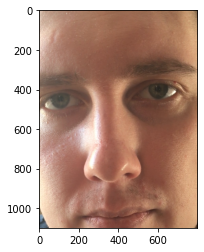

In [63]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/IMG_2934.MOV')  
print(videodata.shape)
y = np.zeros(501)#возьмем первые 500 кадров, что соответствует примерно 17 секундам видео
PR = videodata[:, 100:1200, 100:900, 0]
PG = videodata[:, 100:1200, 100:900, 1]
plt.imshow(videodata[100, 100:1200, 100:900])
for i in range(501):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

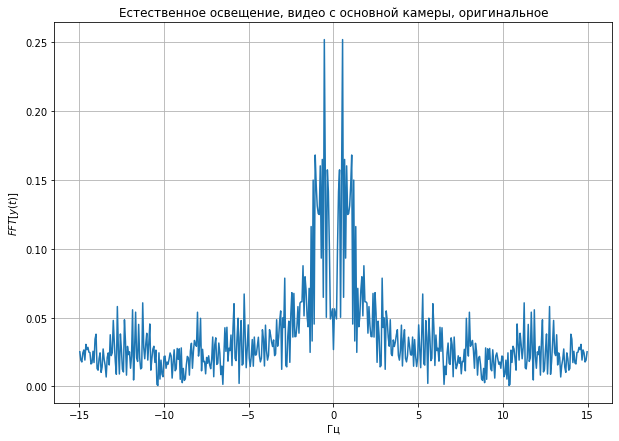

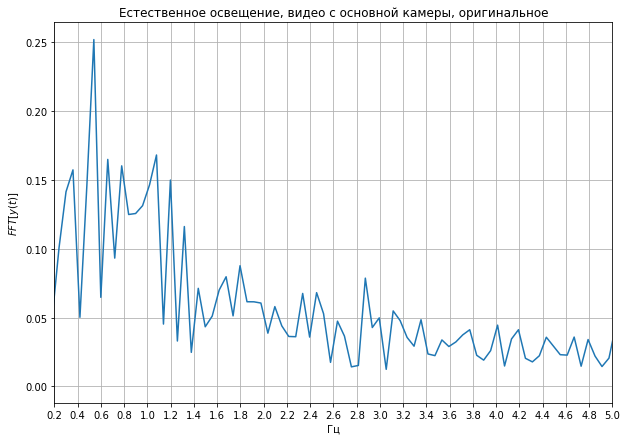

In [69]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(501, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:501])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Естественное освещение, видео с основной камеры, оригинальное')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.2))
plt.title('Естественное освещение, видео с основной камеры, оригинальное')
plt.grid()

Судя по второму графику в интервале от 0,6 Гц до 1,2 Гц значения спектра больше чем в более высоких часотах, однако говорить о преобладании какого то одного нельзя. Поробуем ещё одно видео при естественном освещениии.

(585, 848, 464, 3)


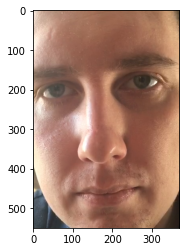

In [75]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/natur_main_orig.mp4')  
print(videodata.shape)
y = np.zeros(501)#возьмем первые 500 кадров, что соответствует примерно 17 секундам видео
PR = videodata[:, 50:600, 30:400, 0]
PG = videodata[:, 50:600, 30:400, 1]
plt.imshow(videodata[100, 50:600, 30:400])
for i in range(501):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

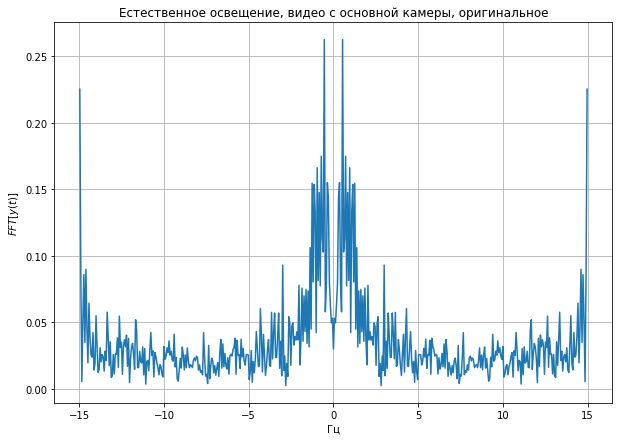

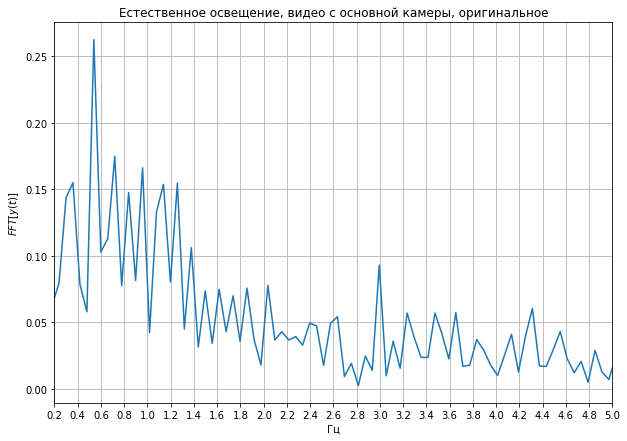

In [76]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(501, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:501])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Естественное освещение, видео с основной камеры, оригинальное')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.2))
plt.title('Естественное освещение, видео с основной камеры, оригинальное')
plt.grid()

В приципе видим схожую картину с предыдущим видео. Попробуем видео с форнтальной камеры

(620, 848, 464, 3)


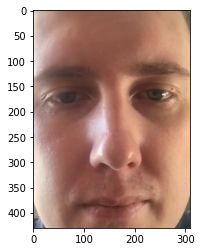

In [83]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/natur_front_orig.mp4')  
print(videodata.shape)
y = np.zeros(501)#возьмем первые 500 кадров, что соответствует примерно 17 секундам видео
PR = videodata[:, 150:580, 70:380, 0]
PG = videodata[:, 150:580, 70:380, 1]
plt.imshow(videodata[100, 150:580, 70:380])
for i in range(501):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

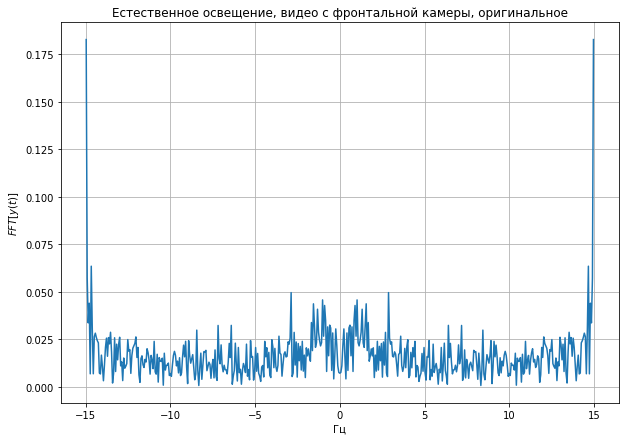

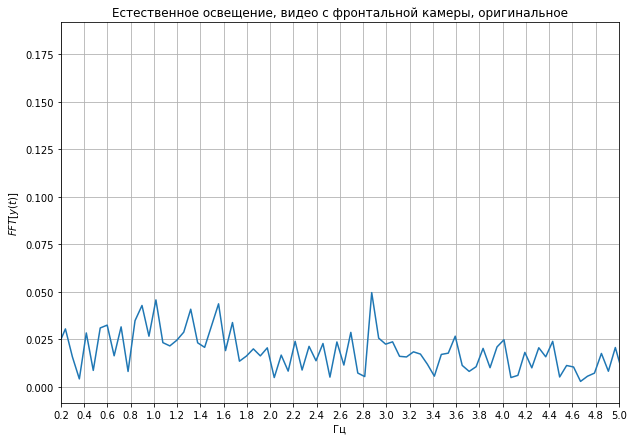

In [87]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(501, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:501])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Естественное освещение, видео с фронтальной камеры, оригинальное')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.2))
plt.title('Естественное освещение, видео с фронтальной камеры, оригинальное')
plt.grid()

В данном случае, вообще говорить о каком-то ярковыраженном пике не приходится.
Теперь попробуем те же самые видео, но записанные с экрана ноутбука (как бы мошеничаем). Оригинальное видео воспроизводится на экране; то, что происходит на экране, снимает камера

(611, 848, 464, 3)


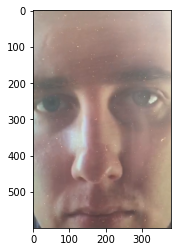

In [94]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/natur_main_screen.mp4')  
print(videodata.shape)
y = np.zeros(501)#возьмем первые 500 кадров, что соответствует примерно 17 секундам видео
PR = videodata[:, 50:650, 20:400, 0]
PG = videodata[:, 50:650, 20:400, 1]
plt.imshow(videodata[100, 50:650, 20:400])
for i in range(501):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

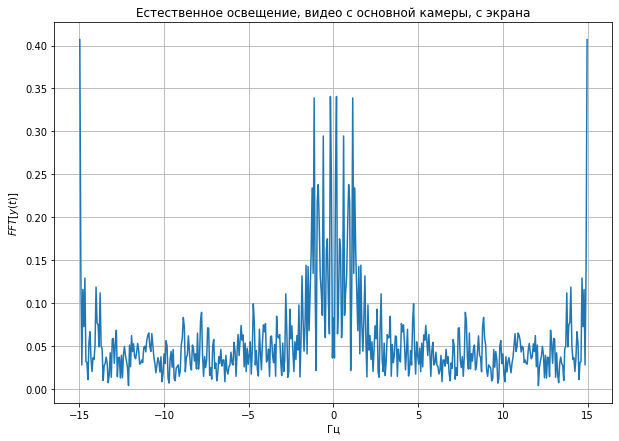

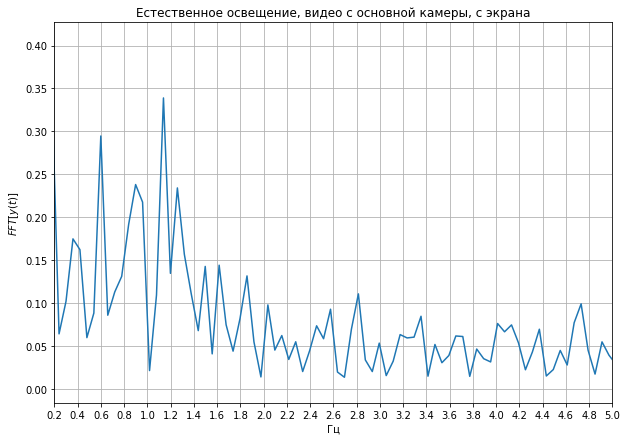

In [95]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(501, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:501])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Естественное освещение, видео с основной камеры, с экрана')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.2))
plt.title('Естественное освещение, видео с основной камеры, с экрана')
plt.grid()

Видим картину, схожую с тем, что было в графиках "Естественное освещение, видео с основной камеры, оригинальное". Форма спектра в интервале от 0,6 Гц до 3 Гц схожи. Слдевательно, различить оригиальное видео и снятое с экрана не представляется возможным по форме спектра. И опять нет ярковыраженного пика от 0,6 Гц до 3 Гц.
Протестируем то же самое, на снятое на фронтальную камеру.

(595, 848, 464, 3)


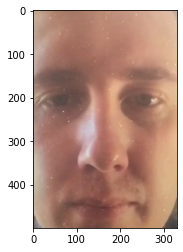

In [102]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/natur_front_screen.mp4')  
print(videodata.shape)
y = np.zeros(501)#возьмем первые 500 кадров, что соответствует примерно 17 секундам видео
PR = videodata[:, 100:600, 50:380, 0]
PG = videodata[:, 100:600, 50:380, 1]
plt.imshow(videodata[100, 100:600, 50:380])
for i in range(501):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

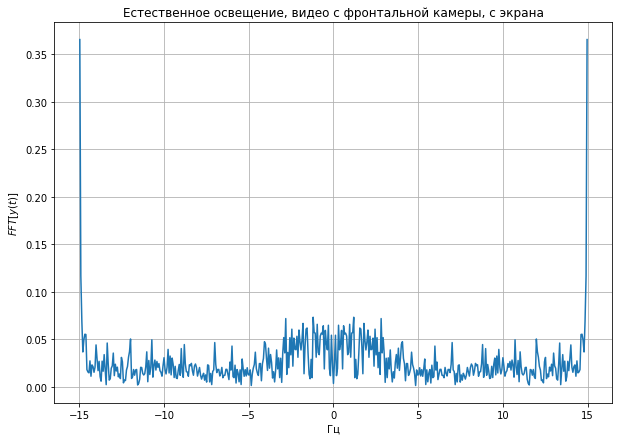

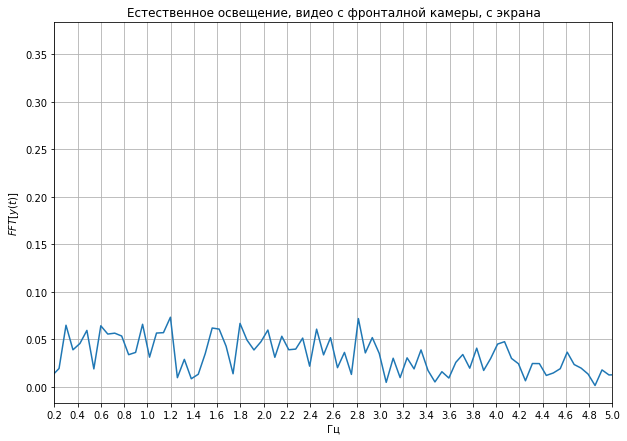

In [103]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(501, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:501])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Естественное освещение, видео с фронтальной камеры, с экрана')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.2))
plt.title('Естественное освещение, видео с фронталной камеры, с экрана')
plt.grid()

И опять видим схожий спектр c "Естественное освещение, видео с фронтальной камеры, оригинальное".
Сравним с видео стены.

(622, 1920, 1080, 3)


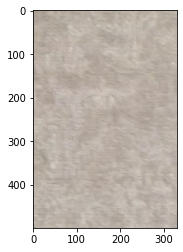

In [104]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/IMG_2939.MOV')  
print(videodata.shape)
y = np.zeros(501)#возьмем первые 500 кадров, что соответствует примерно 17 секундам видео
PR = videodata[:, 100:600, 50:380, 0]
PG = videodata[:, 100:600, 50:380, 1]
plt.imshow(videodata[100, 100:600, 50:380])
for i in range(501):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

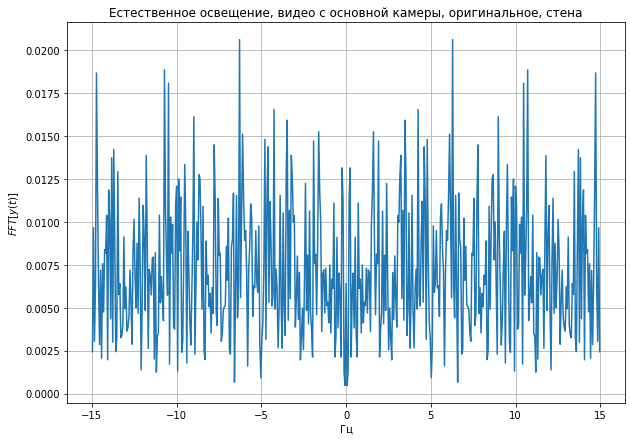

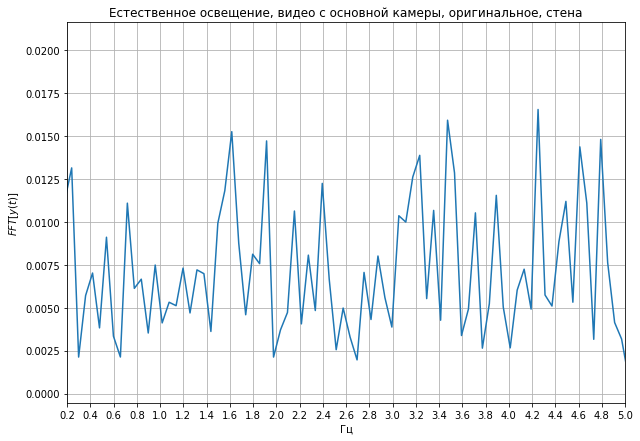

In [105]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(501, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:501])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Естественное освещение, видео с основной камеры, оригинальное, стена')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.2))
plt.title('Естественное освещение, видео с основной камеры, оригинальное, стена')
plt.grid()

Различить стену и человека на видео по спектру можно. Однако, не по наличию пика в интервале 0,6-3Гц, а по чисто шумовому спектру $y(t)$ стены.
Далее будет серия более коротких видео с разных камер и с разным освещением. Сравнивать спектры будем для тех же видео, перезаписанных с экрана ноутбука.

(174, 1280, 720, 3)


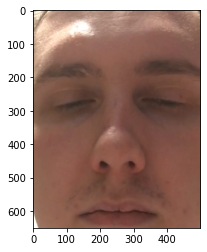

In [109]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/main_original.MOV')  
print(videodata.shape)
y = np.zeros(151)
PR = videodata[:, 150:800, 100:600, 0]
PG = videodata[:, 150:800, 100:600, 1]
plt.imshow(videodata[100, 150:800, 100:600])
for i in range(151):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

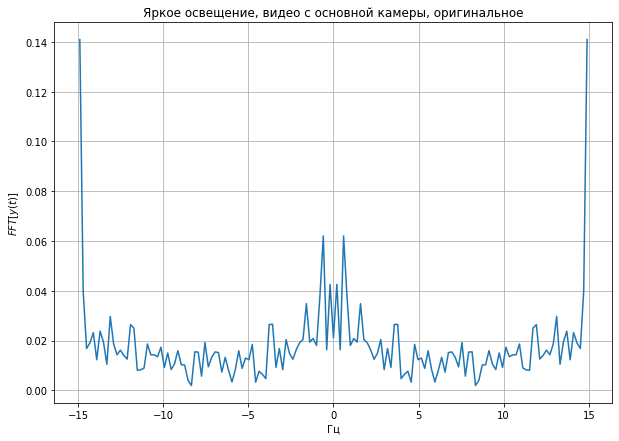

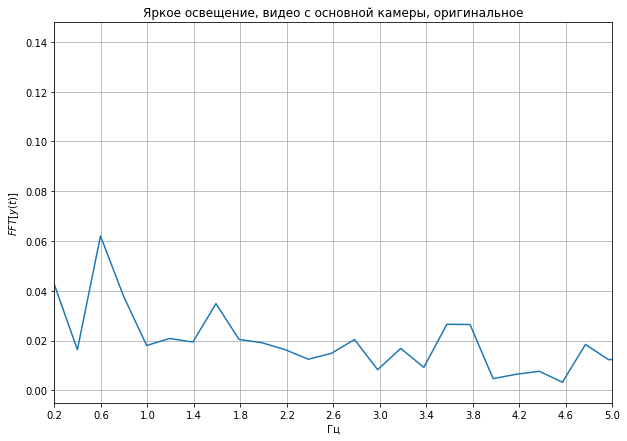

In [111]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(151, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:151])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Яркое освещение, видео с основной камеры, оригинальное')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.4))
plt.title('Яркое освещение, видео с основной камеры, оригинальное')
plt.grid()

(207, 1280, 720, 3)


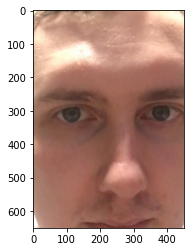

In [113]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/front_original.MOV')  
print(videodata.shape)
y = np.zeros(151)
PR = videodata[:, 50:900, 100:550, 0]
PG = videodata[:, 50:900, 100:550, 1]
plt.imshow(videodata[100, 250:900, 100:550])
for i in range(151):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

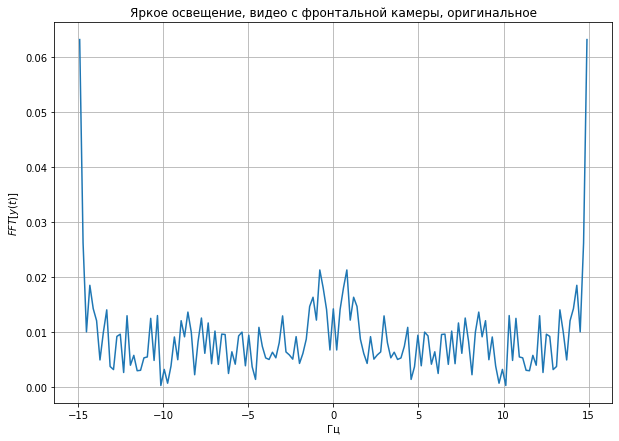

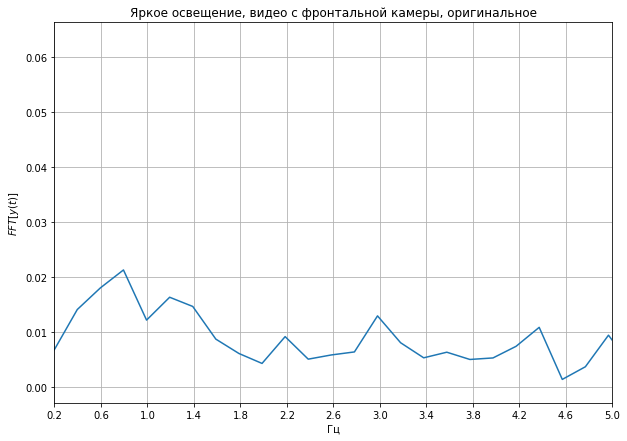

In [116]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(151, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:151])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Яркое освещение, видео с фронтальной камеры, оригинальное')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.4))
plt.title('Яркое освещение, видео с фронтальной камеры, оригинальное')
plt.grid()

(211, 848, 464, 3)


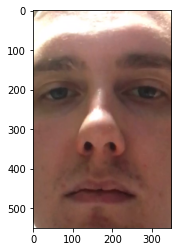

In [119]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/from_screen2.mp4')  
print(videodata.shape)
y = np.zeros(151)
PR = videodata[:, 150:700, 50:400, 0]
PG = videodata[:, 150:700, 50:400, 1]
plt.imshow(videodata[100, 150:700, 50:400])
for i in range(151):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

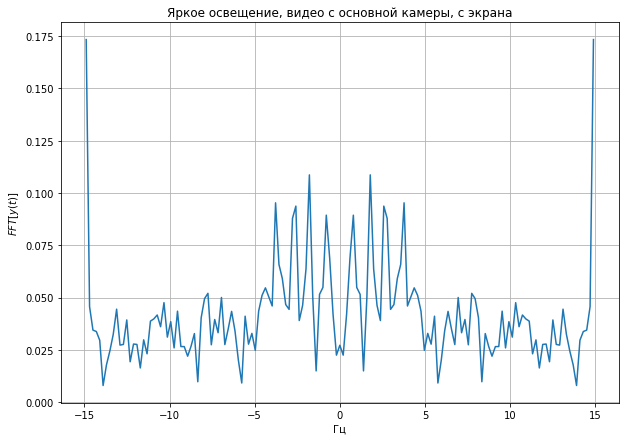

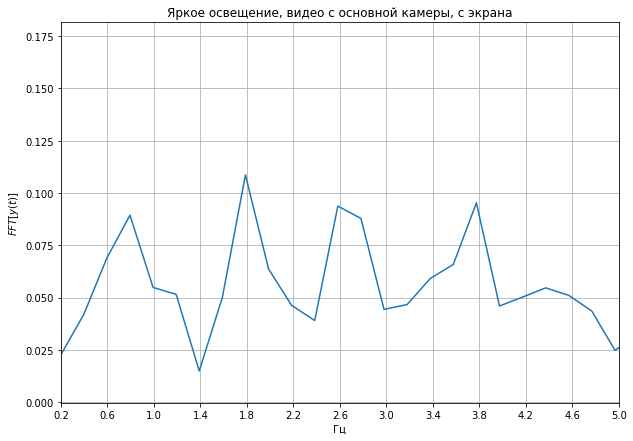

In [121]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(151, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:151])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Яркое освещение, видео с основной камеры, c экрана')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.4))
plt.title('Яркое освещение, видео с основной камеры, с экрана')
plt.grid()

(250, 848, 464, 3)


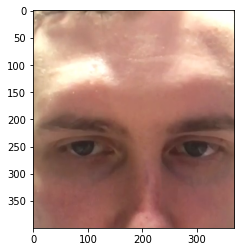

In [124]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/from_screen1.mp4')  
print(videodata.shape)
y = np.zeros(151)
PR = videodata[:, 100:600, 50:380, 0]
PG = videodata[:, 100:600, 50:380, 1]
plt.imshow(videodata[100, 200:600, 30:400])
for i in range(151):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

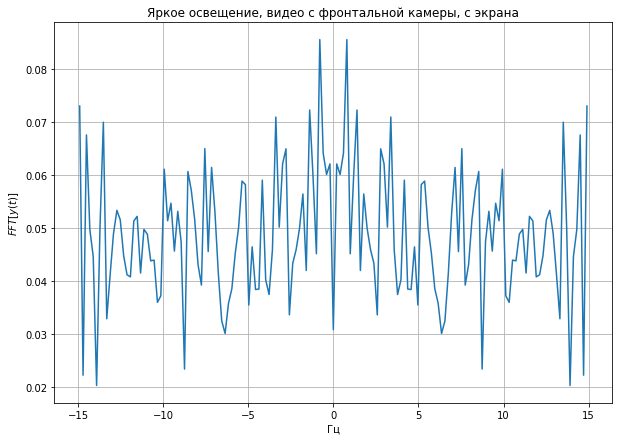

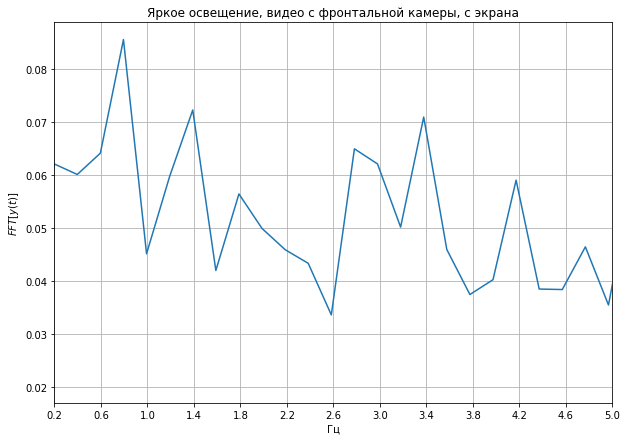

In [125]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(151, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:151])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Яркое освещение, видео с фронтальной камеры, c экрана')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.4))
plt.title('Яркое освещение, видео с фронтальной камеры, с экрана')
plt.grid()

Видно, что в данных примерах нет ярковыраженного пика в интервале 0,6-3 Гц. Значит наличие пульса на видео мы выявить не можем, и, следовательно, не можем различить оригинал и подделку по форме спектра. Выбивается последний пример, скорее всего, в нем слишком много шумов.
Попробуем посмотреть на спектр видео, на котором записана фотография с экрана ноутбука.

(157, 848, 464, 3)


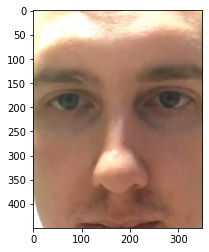

In [129]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/foto_from_screen1.mp4')  
print(videodata.shape)
y = np.zeros(151)
PR = videodata[:, 150:600, 50:400, 0]
PG = videodata[:, 150:600, 50:400, 1]
plt.imshow(videodata[0, 150:600, 50:400])
for i in range(151):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

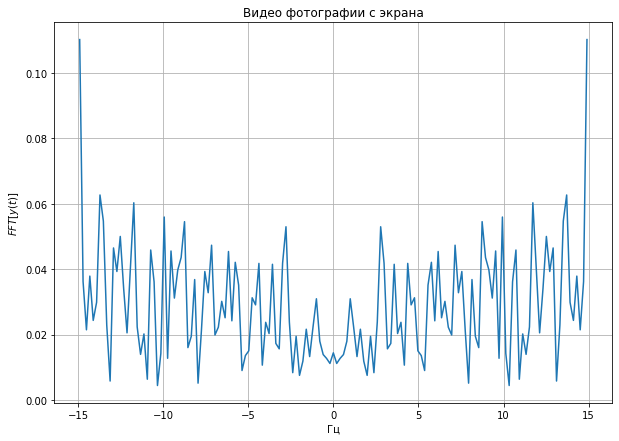

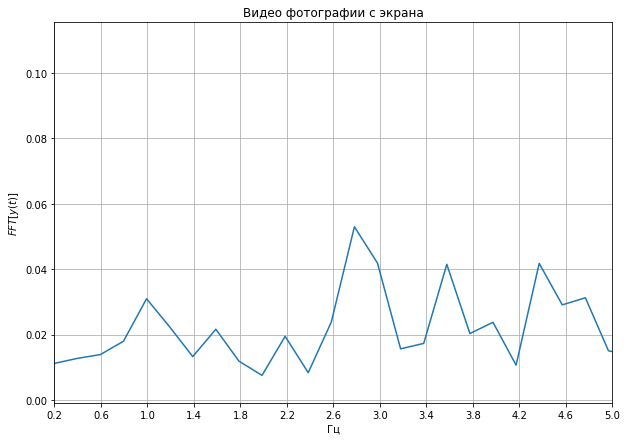

In [130]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(151, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:151])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Видео фотографии c экрана')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.4))
plt.title('Видео фотографии c экрана')
plt.grid()

(135, 848, 464, 3)


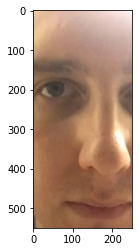

In [134]:
videodata = skvideo.io.vread('/content/gdrive/My Drive/face_recognition/foto_from_screen2.mp4')  
print(videodata.shape)
y = np.zeros(129)
PR = videodata[:, 150:700, 50:300, 0]
PG = videodata[:, 150:700, 50:300, 1]
plt.imshow(videodata[0, 150:700, 50:300])
for i in range(129):
    y[i] = np.log(np.mean(PR[i+1])*np.mean(PG[i])/(np.mean(PG[i+1])*np.mean(PR[i])))

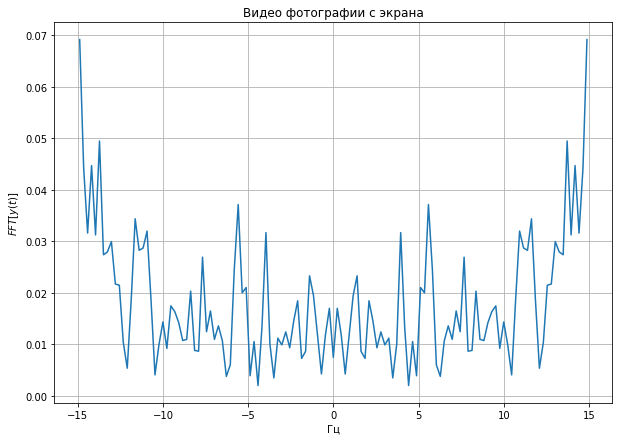

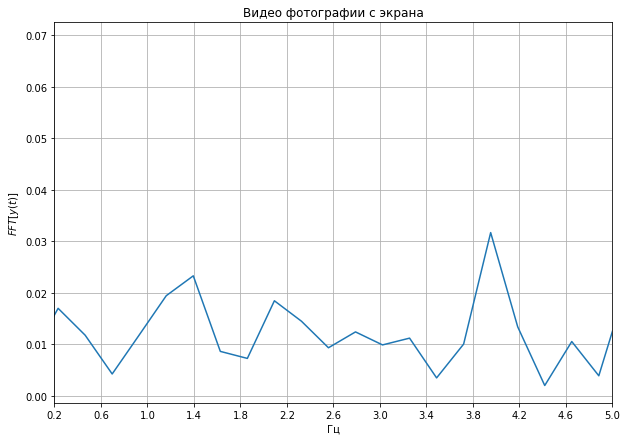

In [135]:
plt.figure(figsize = (10, 7))
fps = 30
freqs = np.fft.fftshift(np.fft.fftfreq(129, 1/fps))
spectr = np.fft.fftshift(np.abs(np.fft.fft(y[0:129])))
plt.plot(freqs, spectr)
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.title('Видео фотографии c экрана')
plt.grid()

plt.figure(figsize = (10, 7))
plt.plot(freqs, spectr)
plt.xlim([0.2, 5])
#plt.ylim([0, 0.1])
plt.xlabel('Гц')
plt.ylabel(r'$FFT[y(t)]$')
plt.xticks(np.arange(0.2,5.2,0.4))
plt.title('Видео фотографии c экрана')
plt.grid()

Видно, что спектры фотографий более зашумленные.

## Вывод
Различить оригинальное видео и видео, снятое с оигинального видео с экрана ноутбука (подделка), по спектру функции $y(t)$ не представляется возможным, так как видео не улавливает пульс (отсутствует ярковыраженный пик, соотвествующий частоте сердцебиения).

Различать статические предметы или фотографии в кадре может быть возможным по, например, соотношению $\frac{\max{FFT[y(t)]}}{\overline{FFT[y(t)](f_1:f_2)}}$ - отношение максимальной амплитуды коэффициентов Фурье к среднему коэффициенту Фурье в опредленном интервале.

Также были попытки применить окно Хэмминга к $y(t)$, но других результатов достичь не удалось. Однако, согласно графикам в статье, даже после простого преобразования Фурье, виден ярковыраженый пик на частоте около 1Гц.